In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv("diabetes.csv")


In [6]:
'''Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.'''

'Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to\nunderstand the distribution and relationships between the variables.'

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

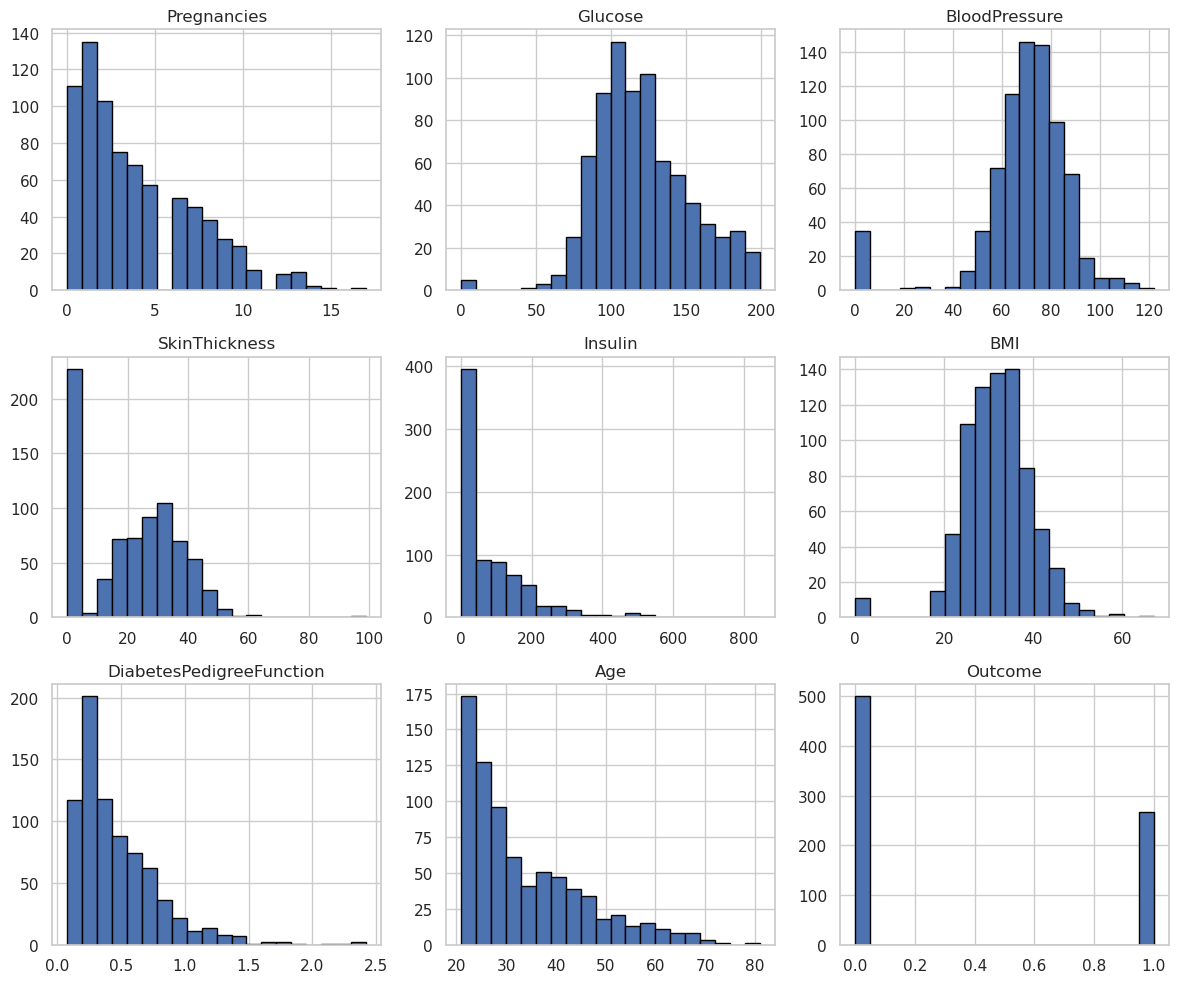

ValueError: Could not interpret input 'categorical_column'

In [13]:
# Display dataset information and summary statistics
print("Dataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe(include='all'))
# Histograms for each numerical variable
sns.set(style="whitegrid")
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()
# Example box plots for numerical variables grouped by a categorical variable
sns.boxplot(data=data, x='categorical_column', y='numerical_column')  # Replace with your columns
plt.title('Box Plot of Numerical Column by Categorical Column')
plt.show()
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data, hue='categorical_column')  # Replace with actual column if applicable
plt.show()
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [14]:
'''Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.'''

'Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical\nvariables into dummy variables if necessary.'

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# Check for missing values
print(data.isnull().sum())
# Fill missing values for numerical columns with the median
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Alternatively, drop rows with missing values
# data.dropna(inplace=True)
# Example using Z-score to remove outliers for a numerical column
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Define a threshold
threshold = 3

# Filter out outliers
data_clean = data[(z_scores < threshold).all(axis=1)]
# Example using IQR for a numerical column
Q1 = data['numerical_column'].quantile(0.25)
Q3 = data['numerical_column'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_clean = data[(data['numerical_column'] >= lower_bound) & (data['numerical_column'] <= upper_bound)]
# Convert categorical variables to dummy variables
data_dummies = pd.get_dummies(data_clean, drop_first=True)
# Identify categorical columns
categorical_cols = data_clean.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform categorical columns
encoded_features = encoder.fit_transform(data_clean[categorical_cols])

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(categorical_cols))

# Concatenate with original data (excluding original categorical columns)
data_preprocessed = pd.concat([data_clean.drop(categorical_cols, axis=1), encoded_df], axis=1)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


KeyError: 'numerical_column'

In [16]:
'''Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.'''

'Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.'

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set features shape: {X_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set target shape: {y_test.shape}")


Training set features shape: (614, 8)
Test set features shape: (154, 8)
Training set target shape: (614,)
Test set target shape: (154,)


In [20]:
'''Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.'''

'Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use\ncross-validation to optimize the hyperparameters and avoid overfitting.'

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Example of loading data, replace this with your actual data loading method
# data = pd.read_csv('your_dataset.csv')

# Prepare features and target variable
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the model using cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

# Test the model on the test set
test_score = best_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score}")


In [1]:
'''Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.'''

'Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,\nprecision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.'

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Example of making predictions
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Diabetes)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



NameError: name 'best_model' is not defined

In [9]:
'''Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.'''

'Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important\nvariables and their thresholds. Use domain knowledge and common sense to explain the patterns and\ntrends.'

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
importances = best_model.feature_importances_
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
importances = best_model.feature_importances_
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


NameError: name 'best_model' is not defined

<Figure size 2000x1000 with 0 Axes>

In [11]:
'''Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.'''

'Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the\ndataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and\nrisks.'

In [12]:
new_data_predictions = .predict(new_data)
from sklearn.metrics import classification_report

# Example: Modify a feature in the test set
X_test_modified = X_test.copy()
X_test_modified['Glucose'] += 10  # Add 10 to Glucose values

y_pred_modified = best_model.predict(X_test_modified)
print(classification_report(y_test, y_pred_modified))
# Example: Create a scenario with missing values
X_test_scenario = X_test.copy()
X_test_scenario.loc[0, 'BMI'] = None  # Introduce missing value

# Impute or handle missing values and then predict
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_test_scenario_imputed = imputer.fit_transform(X_test_scenario)
y_pred_scenario = best_model.predict(X_test_scenario_imputed)

print(classification_report(y_test, y_pred_scenario))



AttributeError: 'DataFrame' object has no attribute 'predict'